In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# NSL_03

### EX 03_1

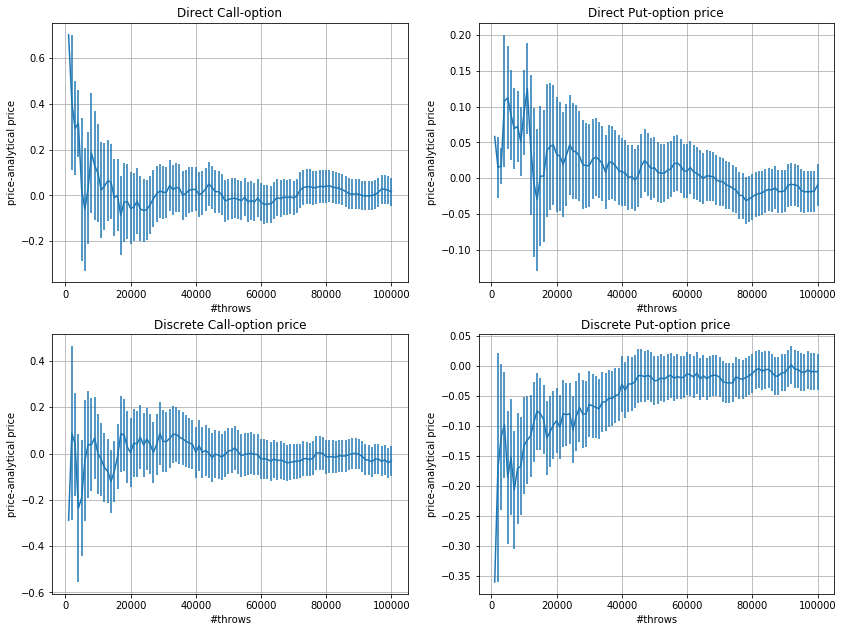

In [3]:
x, stepcall, stepcall_err, stepput, stepput_err, pathcall, pathcall_err, pathput, pathput_err = np.loadtxt("results/es03_1.txt", usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack='true')

price = [stepcall, stepput, pathcall, pathput]
err = [stepcall_err, stepput_err, pathcall_err, pathput_err]
title = ['Direct Call-option','Direct Put-option price','Discrete Call-option price', 'Discrete Put-option price']
ideal = [14.975790778311286, 5.4595325819072364, 14.975790778311286, 5.4595325819072364]

fig, axx = plt.subplots(2, 2,figsize=(14, 10.5))
axx = axx.reshape(-1)

for k in range(4):
    ax = axx[k]
    ax.errorbar(x, price[k]-ideal[k], err[k])
    ax.set_title(title[k])
    ax.set_xlabel(f"#throws")
    ax.set_ylabel(f"price-analytical price")
    ax.grid(True)

These four charts show two different ways of computing the call/put-option price at $t=0$ with these fixed parameters:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

The option price is basically a function of the price at time $T$ hence the difference in the two computations come from how $S(T)$ is sampled. It is known that $S(T)$ is a GBM. The first two graphs (direct) use a single time step of length $T$ to estimate $S(T)$ while the second two graphs (discrete) use a path of $100$ time steps of length $T/100$. The computation has been carried out exploiting the blocking method (this time with a more stuctured code) with $M = 10^5$ thorws and $N = 100$ blocks. It's clear from the charts that all the results are compatible with the analytical one obtained with the Black-Scholes theory (the graphs show the difference between analytical and numerical results).

It is interesting to note that the computations are not at all different, in particular, they have the same uncertainty. This is because the sampling method is exact in the sense that the sequence of point used in the discrete calculation has the joint distribution of the GBM with drift and volatility used. This implies that there ae no discretization errors.
